## Homework three

In [1]:
# load the packages that need to use in this problem
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # this function is used to split the traning and testing data automatically
from sklearn.model_selection import cross_val_score # this function is used to cross_validation automatically
import matplotlib.pyplot as plt # this is used to plot the picture
import seaborn as sns # this is used to plot the heatmap

In [2]:
# read the data 
data_5 = pd.read_table('train.5.txt',header=None,sep=',')
data_6 = pd.read_table('train.6.txt',header=None,sep=',')
print(data_5.shape)
print(data_6.shape)

(556, 256)
(664, 256)


In [3]:
## add label 
data_5['label'] = 1
data_6['label'] = -1

In [4]:
# rename the col index
data_5.columns = [str(i) for i in range(0,256)] + ['lable']
data_6.columns = [str(i) for i in range(0,256)] + ['lable']

In [5]:
# combine two dataframe together
frames = [data_5,data_6]
total_data = pd.concat(frames)

##### Randomly select about 20% of the data and set it aside as a test set.

In [6]:
X = total_data[[str(i) for i in range(0,256)]]
y = total_data['lable']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

##### Train a linear SVM with soft margin. Cross-validate the margin parameter. (it takes some time to run the cv)

In [7]:
estimated_misclassification = list()
for c in np.arange(0.01,1,0.01):
    clf = svm.SVC(kernel='linear', C=c)
    scores = cross_val_score(clf,X_train,y_train, cv=5) #here the k we assume is 5
    misclassification = 1 - scores.mean() 
    estimated_misclassification.append(misclassification)

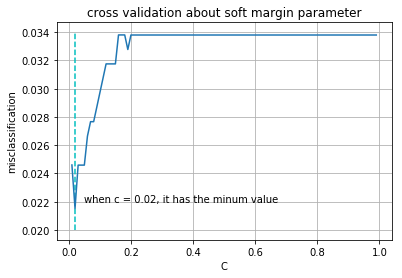

In [8]:
# draw the plot
C = np.arange(0.01,1,0.01)
fig, ax = plt.subplots()
ax.plot(C,estimated_misclassification)

ax.set(xlabel='C', ylabel='misclassification',
       title='cross validation about soft margin parameter')
ax.vlines(0.02,0.02,0.034,colors = "c", linestyles = "dashed")
ax.text(0.05,0.022, 'when c = 0.02, it has the minum value')
ax.grid()
plt.show()

**summary**

As we can see from the plot, when c = 0.02, in the traning set, based on the method of cross validation, it has the lowest missclassification rate.

##### Train an SVM with soft margin and RBF kernel. You will have to cross-validate both the soft-margin parameter and the kernel bandwidth. ( it takes a lot of time, I strongly recommend you don't run.)

In [82]:
estimated_misclassification = list()
for c in np.arange(0.1,0.2,0.01):
    for g in np.arange(0.015,0.025,0.001):
        clf = svm.SVC(kernel='rbf', C=c, gamma=g)
        scores = cross_val_score(clf,X_train,y_train, cv=5)
        misclassification = 1 - scores.mean() 
        estimated_misclassification.append(misclassification)

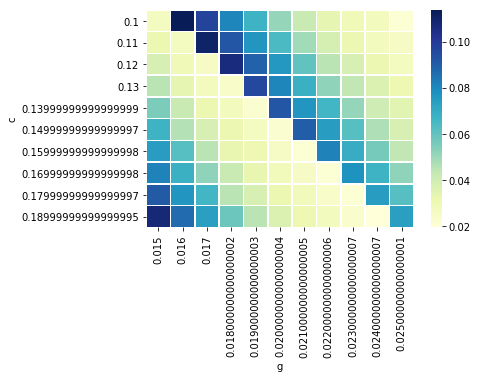

In [99]:
g = np.repeat(np.arange(0.015,0.025,0.001),10)
c = np.tile(np.arange(0.1,0.2,0.01),11)
plot_data = pd.DataFrame({'c':c,
                          'g':g,
                          'misclassification':estimated_misclassification})
plot_data = plot_data.pivot("c", "g", "misclassification")
ax = sns.heatmap(plot_data,cmap="YlGnBu",linewidths=.5)

**summary**

Based on the plot, when c = 0.1 and gamma = 0.025. we will have the smallest estimated missiclassification

##### After you have selected parameter values for both algorithms, train each one with the parameter value you have chosen. Then compute the misclassification rate (the proportion of misclassified data points) on the test set.

In [103]:
# using linear kernel
clf = svm.SVC(kernel='linear', C=0.02)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9877049180327869

In [104]:
# using nonlinear kernel
clf = svm.SVC(kernel='rbf', C=0.1, gamma=0.025)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9344262295081968

**summary**

As we can see from the result: the non-linear kernel gives lower misclassification rate.